In [1]:
import pandas as pd

## 1. Data loading

In [2]:
# Data loading
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# First rows
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Data info
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Integers statistics
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## 2. Editing data that has missing info

In [6]:
# 'Age' has 714 instead of 891, so we fill with median or average
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# 'Embarked' has 889, filling with the most frequent
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# 'Cabin' has little data info, we shall create 'HasCabin' with 0/1
# 1 = has info about cabin, 0 = does not
train_data['HasCabin'] = train_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

# Removing 'Cabin', it's useless now
train_data.drop(columns=['Cabin'], inplace=True)

# Checking, if there are any nulls
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64


C:\Users\mike7\AppData\Local\Temp\ipykernel_22612\1357731852.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\mike7\AppData\Local\Temp\ipykernel_22612\1357731852.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

## 3. Data observation and preparation for model build

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

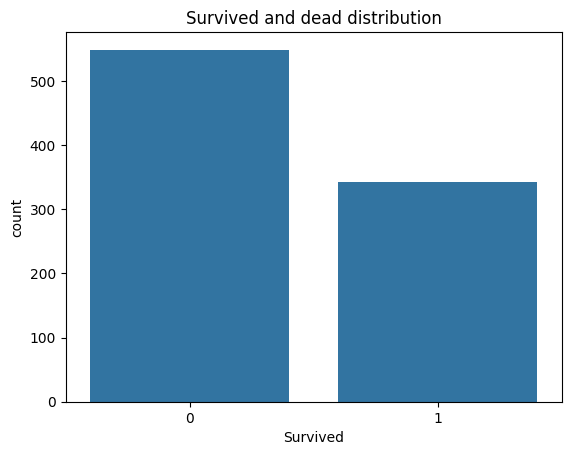

In [8]:
# Dependencies between sex and survival rate
sns.countplot(data=train_data, x='Survived')
plt.title('Survived and dead distribution')
plt.show()

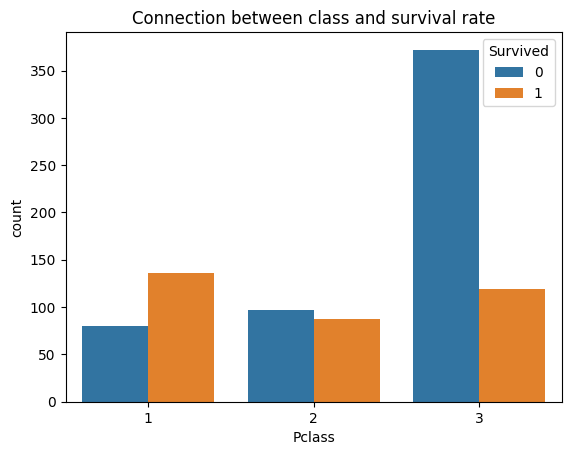

In [9]:
# Dependencies between class and survival rate
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.title('Connection between class and survival rate')
plt.show()

In [10]:
# Sex to integer
train_data['Sex'] = train_data['Sex'].map(
    {
        'male': 0,
        'female': 1
    })

# Converting embarked to dummies
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  HasCabin  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500         0       False        True  
1          PC 17599  71.2833         1       False       False  
2  STON/O2. 3101282   7.9250         0       False        True  
3            113803  53.1000        

## 4. Base model build (LR)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
# Choosing features for the model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Embarked_Q', 'Embarked_S']
# X will be all the features, y is Survived, target
X = train_data[features]
y = train_data['Survived']

# Distribution towards train and test, RS will be 1, but replacable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
# Teaching the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting on a validation sample
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8212


## 5. Improving the result by adding cross-validation

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation - Average accuracy: {cv_scores.mean():.4f}\nStandard deviation: {cv_scores.std():.4f}")

Cross-validation - Average accuracy: 0.7924
Standard deviation: 0.0160


## 6. Trying other models (Random Forest, Gradient Boosting)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [18]:
# Predicting and accuracy score
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.7821


In [19]:
# Hyperparameter selection for RF
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Parameters for search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                              n_iter=100, cv=5, random_state=1, n_jobs=1)
rf_random.fit(X_train, y_train)

# Score of the best model
best_rf_model = rf_random.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
print(f"Best RF Accuracy after tuning: {best_rf_accuracy:.4f}")

Best RF Accuracy after tuning: 0.7933


In [27]:
# Trying Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
# Initiating Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=1)
# Teaching the model
gb_model.fit(X_train, y_train)

# Predicting on the validation sample
y_pred_gb = gb_model.predict(X_test)

# Accuracy score:
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")

Gradient Boosting Accuracy: 0.7933


## 7. Models ensembling - this stage can be skipped!

In [30]:
## We have some models with good results, we can try to combine them
from sklearn.ensemble import VotingClassifier

In [31]:
# Creating the model ensemble
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', best_rf_model),
    ('gb', gb_model)], voting='hard')

# Teaching and predicting
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# Ensemble accuracy score
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")

Voting Classifier Accuracy: 0.8101


In [32]:
# Another way
# Creating the model ensemble, but soft-voting
voting_clf_soft = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000, solver='liblinear')),
    ('rf', best_rf_model),
    ('gb', gb_model)], voting='soft')

# Teaching and predicting
voting_clf_soft.fit(X_train, y_train)
y_pred_voting_soft = voting_clf_soft.predict(X_test)

# Ensemble accuracy score
voting_soft_accuracy = accuracy_score(y_test, y_pred_voting_soft)
print(f"Voting Classifier Accuracy: {voting_soft_accuracy:.4f}")

Voting Classifier Accuracy: 0.7933


## 8. XGBoost - this stage can be skipped!

In [33]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [34]:
# Model initializing
xgb_model = xgb.XGBClassifier(random_state=1, use_label_encoder=False, eval_metrics='logloss')

# Teaching the model
xgb_model.fit(X_train, y_train)

# Predicting on the validation sample
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy score
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

XGBoost Accuracy: 0.7709


D:\Python\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:31:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [38]:
# Let's try to improve this number
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [41]:
# Model initializing again (to remove warnings below)
xgb_model = xgb.XGBClassifier(random_state=1, eval_metric='logloss')

In [42]:
# Parameters for the selection
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# RandomizedSearchCV for XGBoost
xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                               n_iter=100, cv=5, random_state=1, n_jobs=1)

# Teaching
xgb_random.fit(X_train, y_train)

# Best model
best_xgb_model = xgb_random.best_estimator_

# Accuracy score
y_pred_best_xgb = best_xgb_model.predict(X_test)
best_xgb_accuracy = accuracy_score(y_test, y_pred_best_xgb)
print(f"Best XGBoost Accuracy after tuning: {best_xgb_accuracy:.4f}")

Best XGBoost Accuracy after tuning: 0.7821


## 9. Final steps

In [46]:
## Let's try to improve LR model before uploading csv
from sklearn.model_selection import GridSearchCV
# Parameters for search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Hyperparameters search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_log_reg = grid_search.best_estimator_
print(f"Best Logistic Regression Accuracy: {grid_search.best_score_:.4f}")  # 0.8076 is even worse, bruh

Best Logistic Regression Accuracy: 0.8076


In [48]:
# Data loading
test_data = pd.read_csv('test.csv')

# Converting data similarly to training
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
test_data['HasCabin'] = test_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
test_data.drop(columns=['Cabin'], inplace=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

C:\Users\mike7\AppData\Local\Temp\ipykernel_22612\2737397728.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\mike7\AppData\Local\Temp\ipykernel_22612\2737397728.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [51]:
# Let's be sure that features match with teaching sample
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Embarked_Q', 'Embarked_S']
X_test = test_data[features]

# Predicting on a test data list
test_predictions = best_log_reg.predict(X_test)

In [52]:
# Forming DataFrame to send on Kaggle
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": test_predictions
})

# To CSV
submission.to_csv('submission.csv', index=False)